# Regression

# Linear Regression

After the data exploration from the last couple days, we want to use linear regression to see if we can predict some things about average life expectancy by country.

To get started we import some modules. The first two we are familiar with from the previous notebook.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We'll also import our data using pandas:

In [154]:
lifeexp = pd.read_csv('lifeexp_filtered.csv')

Let's take a look at the data.

Remember, using dataname.head() shows us the columns and first five rows of the data, so that we can get an idea of what the data looks like.

In [155]:
lifeexp.head()

,Country,Year,Status,Status_binary,Lifeexp,Adultmortality,Infantdeaths,Alcohol,PercExpend,HepB,...,Polio,Totalexpend,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19yrs,thinness5-9yrs,Incomecompofresources,Schooling
0,Afghanistan,2015,Developing,0,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,0,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,0,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,0,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,0,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Now, onto the regression! We'll start out by trying to get a best-fit for income composition of resources vs. life expectancy. These two should be well correlated. Let's see if that holds true by plotting.

Here, the plot command tells me to plot points (`kind = 'scatter'`), and that we want the variable 'Income composition of resources' on the x-axis, and 'Life expectancy' on the y-axis. By using dataname.plot, I don't need to specify my dataset - it already knows. 

I could also use the command `plt.scatter`, but then I would need to specify that my x-axis data is `lifeexp.Incomecompofresources`, and same for the y-axis data, so that the plot command knows what dataset I'm trying to plot from.

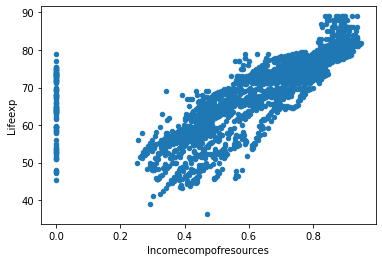

In [156]:
lifeexp.plot(kind='scatter', x='Incomecompofresources', y='Lifeexp')

Let's split it into our training and testing data sets.

In [157]:
training_life = lifeexp[0:int(len(lifeexp)*0.75)]    # Note: [0:int(len(x_array)*0.75)] gives the first 3/4 of the data.
                                               # For example, if there were 12 elements in the array, 
                                               # int(len(x_array)*0.75) = 9. So we are saying we want x_array[0:9],
                                               # in other words, we are taking the first 9 elements of the array.
testing_life = lifeexp[int(len(lifeexp)*0.75):-1]    # Note: [int(len(x_array)*0.75),-1] gives the last 1/4 of the data.
                                               # Again, if there are 12 elements in the array, 
                                               # int(len(x_array)*0.75) = 9. Then [int(len(x_array)*0.75),-1] gives 
                                               # the 9th through the last element of the array.

Instead of going through all the details we did in lecture, where we had to specify the cost function and how we wanted to minimize it, we can just use numpy to find the best-fit line for predicting life expectancy based on income composition of resources!

Using np.polyfit fits a polynomial of a given degree to the given data and returns the polynomial coefficients. This algorithm explicitly minimizes the sum of squared errors (use the command `help(np.polyfit)` to check out more details). 

So, in the code below, we are saying that we want to fit a polynomial of degree 1 (a linear model) to data that comes from our `lifeexp` dataset, where the input is the `Incomecompofresources` variable and the output should be `Lifeexp`. By printing the output of our `least_squares`, we get the coefficients.

In [158]:
least_squares = np.polyfit(training_life.Incomecompofresources,
                           training_life.Lifeexp, 1) # The last argument in "polyfit" is "1" because we want a
                                                     # polynomial of degree 1, otherwise known as a line.
print(least_squares)

[33.17757287 48.71241996]


The first entry is m, the second is b, if $y=mx+b$.

We now use these numbers to create our model using a function! To do so, we'll define `m` and `b`, which are given by the output of our least_squares polynomial fit (remember, Python starts its indexing at 0, so the first value we see is actually the 0th value for Python). Then, the output of our model function will be y = mx + b, where y is life expectancy and x (the input) is ICOR.

In [159]:
def least_squares_line(ICOR):    #ICOR stands for Incomecompofresources
    m = least_squares[0]
    b = least_squares[1]
    return b + m*ICOR

## Let's plot it all together!

### First plot the training data and the best-fit line.

To do that, we will first need to make "many x points" as we have done before.

In [160]:
many_x_points = np.arange(training_life.Incomecompofresources.min(), training_life.Incomecompofresources.max(), 0.001)
# Note: training_life.Incomecompofresources.min() gives the smallest value of training_life.Incomecompofresources and
#       training_life.Incomecompofresources.max() gives the largest value of training_life.Incomecompofresources.

Now you need to fill in some details. Below we want to plot the data and the least-squares line (defined via the function "least_squares_line"). One line is left blank. How will you fill it in?

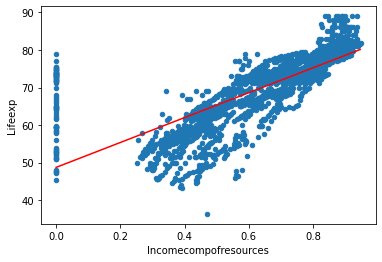

In [161]:
training_life.plot(kind='scatter', x = 'Incomecompofresources', y = 'Lifeexp')
plt.plot(many_x_points,
        least_squares_line(many_x_points),
        'r')

The first line in the code above tells me to plot my data. 

The next lines (starting with `plt.plot`) are where we plot the model - first, we give it the x-data to plot, which is our `many_x_points`, a bunch of points ranging between the smallest ICOR value and the largest ICOR value from our training data. The y-data it needs to plot is the output of our model, y = mx + b, which we defined using `least_squares_line`. So, the y-data should be `least_squares_line(many_x_points)` - remember that our model needs an input, so we give the function `least_squares_line` the correct input `ICOR` that matches our x-data.

### Now you: plot the testing data and the best-fit line for the testing data

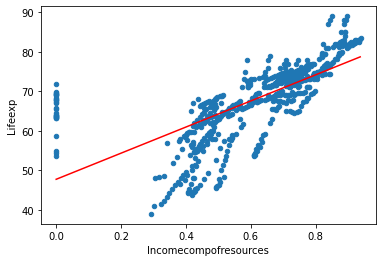

In [162]:
#My Work
testing_least_squares = np.polyfit(testing_life.Incomecompofresources, testing_life.Lifeexp, 1)
testing_many_x_points = np.arange(testing_life.Incomecompofresources.min(), testing_life.Incomecompofresources.max(), 0.001)

def testing_least_squares_line(ICOR):
    m = testing_least_squares[0]
    b = testing_least_squares[1]
    return b + m*ICOR

testing_life.plot(kind='scatter', x = 'Incomecompofresources', y = 'Lifeexp')
plt.plot(testing_many_x_points, testing_least_squares_line(testing_many_x_points),'r')

Create our x-data points in the appropriate range for the testing dataset:

In [163]:
many_test_points = np.arange(testing_life.Incomecompofresources.min(), testing_life.Incomecompofresources.max(), 0.001)

Plot the data and then the model, where we now evaluate the model at the x-data for the testing set instead of the training set:

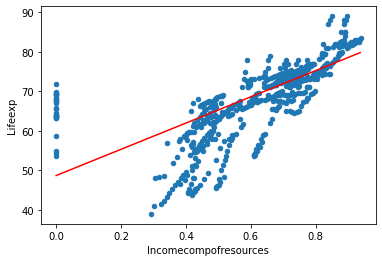

In [164]:
testing_life.plot(kind='scatter', x = 'Incomecompofresources', y = 'Lifeexp')
plt.plot(many_test_points,
        least_squares_line(many_test_points),
        'r')

## Calculate the error using the testing data.

The following gives an array that holds the relative error for each house in the testing data. Question: What does np.abs do?

Answer: takes the absolute value of the input to np.abs()

In [165]:
error_array = np.abs(testing_life.Lifeexp - least_squares_line(testing_life.Incomecompofresources))/testing_life.Lifeexp

This array now contains the relative absolute error, defined as: abs(true - predicted)/true, at every single datapoint in the testing dataset.

We now want to find the average value of the relative absolute error over the whole testing dataset. Luckily numpy has this built in!

In [166]:
np.average(error_array)

0.07971930757770233

The average error in my testing data is 7.9%. What is the correlation coefficient?

In [167]:
np.corrcoef(lifeexp.Lifeexp, lifeexp.Incomecompofresources)[1,0] # This gives the correlation coefficient. 
                                                   # The data is pretty well-correlated

0.7351577172384189

In `np.corrcoef` above, we are telling numpy to calculate the correlation between the two variables `Lifeexp` and `Incomecompofresources`. This will return an array, where the first row and column corresponds to `Lifeexp` and the second row and column to `Incomecompofresources` - that is, if I want the correlation coefficient betweent `Lifeexp` and `Lifeexp`, I would look at the upper left entry (which will be 1, because a variable is perfectly correlated to itself). We want the correlation coefficient between the different variables, so I will specifically ask for the `[1,0]` entry of the array, which tells me the correlation coefficient between ICOR and life expectancy, as desired.

### What about the zeros?

That data where the income composition of resources is equal to zero looks like it might be throwing off our model fit. If we ignore data with such zeros (assuming this to be non-reported or missing data), can we get a better fit? We'll start by creating a new dataframe without those zero values:

In [168]:
lifeexp_filtered = lifeexp[lifeexp['Incomecompofresources'] != 0]
# Note the != symbol means 'not equal to', so we are extracting only data where Incomecompofresources is not equal to zero.
# In other words, we are creating a new dataset where we have pulled only the data from lifeexp such that the variable
# `Incomecompofresources` is not equal to zero.

Now, we'll repeat the process above. First, create the training and testing datasets from our filtered dataset:

In [169]:
training_filtered = lifeexp_filtered[0:int(len(lifeexp_filtered)*0.75)]    # Note: [0:int(len(x_array)*0.75)] gives the first 
                                               # 3/4 of the data.
                                               # For example, if there were 12 elements in the array, 
                                               # int(len(x_array)*0.75) = 9. So we are saying we want x_array[0:9],
                                               # in other words, we are taking the first 9 elements of the array.
testing_filtered = lifeexp_filtered[int(len(lifeexp_filtered)*0.75):-1]    # Note: [int(len(x_array)*0.75),-1] gives the last 
                                               # 1/4 of the data.
                                               # Again, if there are 12 elements in the array, 
                                               # int(len(x_array)*0.75) = 9. Then [int(len(x_array)*0.75),-1] gives 
                                               # the 9th through the last element of the array.

Now, fit a degree 1 polynomial using numpy's polyfit and print the model coefficients:

In [170]:
least_squares_filt = np.polyfit(training_filtered.Incomecompofresources,
                           training_filtered.Lifeexp, 1) # The last argument in "polyfit" is "1" because we want a
                                                     # polynomial of degree 1, otherwise known as a line.
print(least_squares_filt)

[50.28726368 36.59033772]


Next, define the model's function:

In [171]:
def least_squares_line_filt(ICOR):    #ICOR stands for Incomecompofresources
    m = least_squares_filt[0]
    b = least_squares_filt[1]
    return b + m*ICOR

And plot it! We'll create a bunch of points in the possible ICOR range, then plot the data and the model on top.

In [172]:
many_x_filt = np.arange(training_filtered.Incomecompofresources.min(), training_filtered.Incomecompofresources.max(), 0.001)

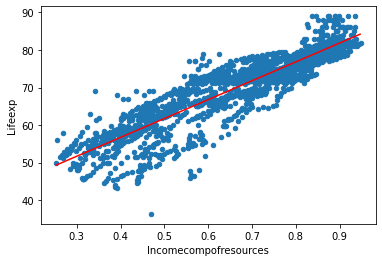

In [173]:
training_filtered.plot(kind='scatter', x = 'Incomecompofresources', y = 'Lifeexp')
plt.plot(many_x_filt,
        least_squares_line_filt(many_x_filt),
        'r')

Now, let's check out the error by calculating the relative absolute error at each datapoint in the testing dataset and calculating the average.

In [174]:
error_array_filt = np.abs(testing_filtered.Lifeexp - 
                          least_squares_line_filt(testing_filtered.Incomecompofresources))/testing_filtered.Lifeexp
np.average(error_array_filt)

0.05812018252892297

Error is now only 5.8% - that's a lot better. Do we think removing the zero values as we did is a valid thing to do?

Answers we came up with in class - yes, for this particular instance. We know that the zeros included here were only from missing data, where the ICOR wasn't reported for a particular country or year. However, for other datasets (or even other variables), 0 might be a valid measurement, and removing them would actually be tossing out relevant data. So, in general, we want to carefully consider our dataset (and its documentation) before removing data.

Finally, check out the correlation between ICOR and life expectancy after the extraneous data was removed:

In [175]:
np.corrcoef(lifeexp_filtered.Lifeexp, lifeexp_filtered.Incomecompofresources)[1,0] # This gives the correlation coefficient. 
                                                   # The data is even more correlated now.

0.8913221920804534

# Now you. What can you find out about the data? What can you predict about the average life expectancy for a country using certain features? Can you predict anything else? It's your chance to play around!

In [176]:
#setup
t_least_squares_filt = np.polyfit(testing_filtered.Year, testing_filtered.Measles, 1)

def t_least_squares_line_filt(ICOR):
    m = t_least_squares_filt[0]
    b = t_least_squares_filt[1]
    return b + m*ICOR

t_many_x_filt = np.arange(testing_filtered.Year.min(), testing_filtered.Year.max(), 0.001)

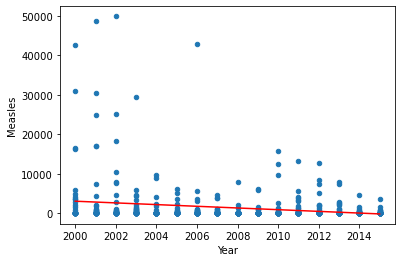

In [177]:
#plotting
testing_filtered.plot(kind='scatter', x = "Year", y = 'Measles')
plt.plot(t_many_x_filt, t_least_squares_line_filt(t_many_x_filt), 'r')

In [178]:
#calculating error
custom_error_array_filt = np.abs(testing_filtered.Measles - least_squares_line_filt(testing_filtered.Year))/testing_filtered.Measles
np.average(custom_error_array_filt)

inf

# Regression Project

We now have the tools we need to get working on our regression project. After setting up your group notebook following the instructions given in the introduction of the project and 'question' 1, begin answering questions 2 and 3:

2. Answer the following questions about the data:

   (a) Import your data. What are the features of the data?

   (b) Make 3 scatter plots of one feature vs. another. Be sure to label your axes clearly in each case.

   (c) Comment on each scatterplot. Which features are highly correlated? Does this make sense to you or not? Explain.
   
(i) For those features that you think are highly correlated, back up your argument by finding the correlation coefficient.

   (d) Which features do you expect will not be well represented by a linear fit?

3. Make a prediction for the chance of someone to be admitted to graduate school assuming that they have a GRE score of 315. You should use what you have learned in this class to do so.

## What if the data or data features we're looking at aren't linear?

# Nonlinear Regression

Let's look at the same dataset, but now at different features.

We already have our training/testing dataset split, so we're good to go.

Let's plot the data before we try to model it to see an example of a nonlinear relationship

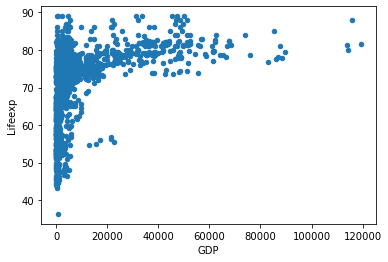

In [179]:
training_life.plot(kind='scatter', x = 'GDP', y = 'Lifeexp')

To get a least squares fit for this it's pretty easy, we can just use numpy:

In [180]:
least_squares_new = np.polyfit(training_life.GDP,
                           training_life.Lifeexp, 1)
print(least_squares_new)

[3.02047218e-04 6.74212529e+01]


The first entry is m, the second is b, if y=mx+b

In [181]:
def least_squares_line_new(GDP):
    return least_squares_new[1] + least_squares_new[0]*GDP

Let's first see how it does on the training data:

In [182]:
many_training_points = np.arange(training_life.GDP.min(), training_life.GDP.max())

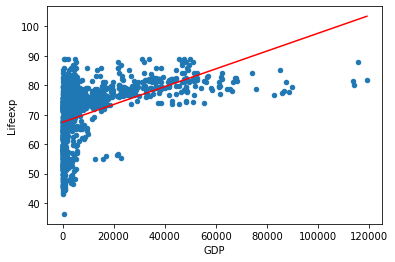

In [183]:
training_life.plot(kind='scatter', x = 'GDP', y = 'Lifeexp')
plt.plot(many_training_points, least_squares_line_new(many_training_points), c='r')

Next let's see how it does on the testing data

In [184]:
many_testing_points = np.arange(testing_life.GDP.min(), testing_life.GDP.max())

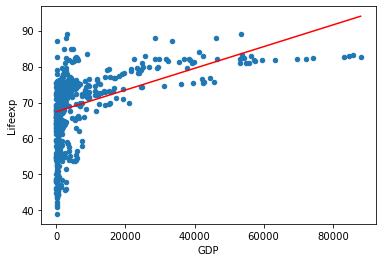

In [185]:
testing_life.plot(kind='scatter', x = 'GDP', y = 'Lifeexp')
plt.plot(many_testing_points, least_squares_line_new(many_testing_points), c='r')

Next let's plot it together

In [186]:
many_points = np.arange(lifeexp.GDP.min(), lifeexp.GDP.max())

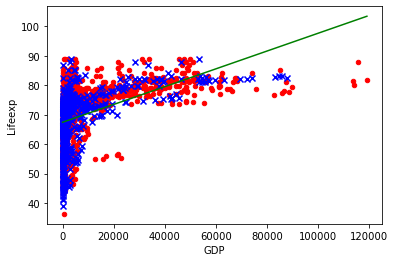

In [187]:
training_life.plot(kind = 'scatter', x = 'GDP', y = 'Lifeexp', 
            c = 'Red', marker = 'o')
plt.scatter(testing_life.GDP, testing_life.Lifeexp, 
            c = 'Blue', marker = 'x')
plt.plot(many_points, least_squares_line_new(many_points), c = 'Green')

Add a cell to our data frame with the absolute value of the relative error for the testing data

In [188]:
testing_life["abs_rel_err"] = abs(least_squares_line_new(testing_life.GDP) - 
                                                       testing_life.Lifeexp)/testing_life.Lifeexp
testing_life.head()

,Country,Year,Status,Status_binary,Lifeexp,Adultmortality,Infantdeaths,Alcohol,PercExpend,HepB,...,Totalexpend,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19yrs,thinness5-9yrs,Incomecompofresources,Schooling,abs_rel_err
1861,Romania,2013,Developed,1,74.6,138,2,9.59,1230.748231,96.0,...,5.60,92.0,0.1,9585.266593,19983693.0,2.7,2.9,0.794,14.7,0.057420
1862,Romania,2012,Developed,1,74.4,138,2,9.58,1078.358105,96.0,...,5.48,91.0,0.1,8558.397660,25835.0,2.8,3.0,0.797,15.3,0.059055
1863,Romania,2011,Developed,1,74.3,139,2,9.10,10.325889,96.0,...,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7,0.092206
1864,Romania,2010,Developed,1,73.4,153,2,9.00,983.251809,98.0,...,5.83,94.0,0.1,8297.483621,2246871.0,3.0,3.2,0.797,15.8,0.047309
1865,Romania,2009,Developed,1,73.1,158,2,10.40,14.963736,95.0,...,5.56,95.0,0.1,822.183290,2367487.0,3.0,3.3,0.795,15.4,0.074287


What is the average error?

In [189]:
testing_life.abs_rel_err.mean()

0.10653537565510647

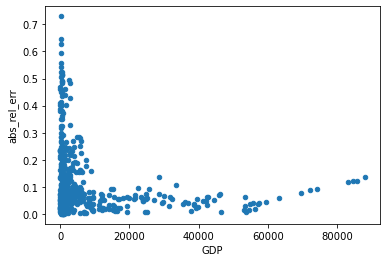

In [190]:
testing_life.plot(kind = 'scatter', x='GDP',y='abs_rel_err')

**Okay, so the error isn't terribly good, and we see a lot of error particularly for countries with low GDP... But we can see that our data is hardly linear. Rather, it appears to increase very sharply before leveling off - almost like a logarithmic function. This is a systematic error or a model error. Can we do better if we take into account the nonlinearity?**

Let's assume we have a model of the following form:

$ Life expectancy = a + b(\text{GDP}) + c \ln(\text{GDP})$

and we want to find a, b, and c. **Why do we guess something of this form?**

To solve this, we'll let Python use nonlinear least squares to solve for our parameters.

Let's go ahead and define our total error:

In [191]:
def total_err(a, b, c):
    return sum((a + b*np.array(training_life.GDP)
                + c*np.log(training_life.GDP)
                - np.array(training_life.Lifeexp))**2)

Let's take a quick look at what this function looks like. We are going to let Python use gradient descent to numerically minimize this

In [241]:
from scipy import optimize
from scipy.optimize import curve_fit

To use this function we need one little technicality. Instead of having 3 inputs, we need one input which is a vector (a list). Let's change our error function.

In [193]:
def total_err_vector(x):
    return total_err(x[0], x[1], x[2])

In [194]:
a, b, c = optimize.fmin_cg(total_err_vector, 
         np.array([least_squares_new[1], least_squares_new[0], 3]))

         Current function value: 133162.635799
         Iterations: 14
         Function evaluations: 316
         Gradient evaluations: 76


In [195]:
def regress(x):
    return a + b*x + c*np.log(x)

Let's try another method. Rather than directly minimizing an error function with gradient descent, what if we use *nonlinear* least squares to fit our target function to the data directly?

In [196]:
def func2(GDP, p, q, r):
    return p + q*np.array(GDP) + r*np.log(GDP)

In [197]:
popt, pcov = curve_fit(func2, training_life.GDP, training_life.Lifeexp)
popt

array([4.73923537e+01, 3.33355137e-05, 2.93656289e+00])

In [198]:
def nlls(GDP):
    return popt[0] + popt[1]*GDP + popt[2]*np.log(GDP)

First let's plot it with the training data

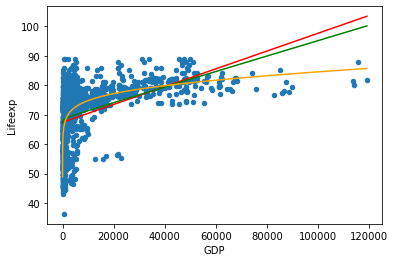

In [199]:
training_life.plot(kind = 'scatter', x='GDP',y='Lifeexp')
plt.plot(many_training_points,
        least_squares_line_new(many_training_points),c='r')
plt.plot(many_training_points, 
         regress(many_training_points), c='g')
plt.plot(many_training_points, nlls(many_training_points), c = 'orange')

Hmm. Our attempt to solve the model by minimizing the error function with gradient descent doesn't seem to change all that much from our initial linear model, but the nonlinear least squares method looks a lot better. This suggests that the gradient descent error-minimizing method was highly sensitive to the initial parameter guesses we gave it. Why might this be?

What is the average absolute relative error for the training data with each model?

In [239]:
#Linear model
print(sum(abs(least_squares_line_new(training_life.GDP)-training_life.Lifeexp)/training_life.Lifeexp)/len(training_life.GDP))
#Gradient descent model
print(sum(abs(regress(training_life.GDP)-training_life.Lifeexp)/training_life.Lifeexp)/len(training_life.GDP))
#Nonlinear regression model
print(sum(abs(nlls(training_life.GDP)-training_life.Lifeexp)/training_life.Lifeexp)/len(training_life.GDP))

0.10710237410439144
0.10529025642905261
0.08913044080987369


That's an improvement! We got nearly 2% lower error by using a nonlinear model. Let's see how it looks compared to the testing data:

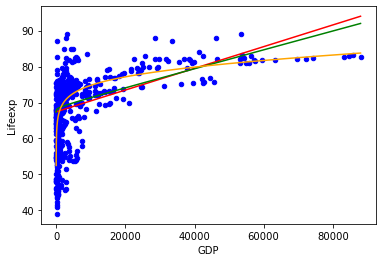

In [242]:
testing_life.plot(kind = 'scatter', x='GDP',y='Lifeexp',c='b')
plt.plot(many_testing_points, least_squares_line_new(many_testing_points),c='r')
plt.plot(many_testing_points, regress(many_testing_points), c='g')
plt.plot(many_testing_points, nlls(many_testing_points), c = 'orange')

It looks like now we've got the general shape down, but we still have the same error terms we had with the least squares line. Let's calculate the total relative error.

In [243]:
testing_life["abs_rel_err_NL_regress"] = abs(regress(testing_life.GDP) - 
            testing_life.Lifeexp)/testing_life.Lifeexp
testing_life["abs_rel_err_NLLS"] = abs(nlls(testing_life.GDP) - 
            testing_life.Lifeexp)/testing_life.Lifeexp
testing_life.head()

,Country,Year,Status,Status_binary,Lifeexp,Adultmortality,Infantdeaths,Alcohol,PercExpend,HepB,...,HIV/AIDS,GDP,Population,thinness1-19yrs,thinness5-9yrs,Incomecompofresources,Schooling,abs_rel_err,abs_rel_err_NL_regress,abs_rel_err_NLLS
1861,Romania,2013,Developed,1,74.6,138,2,9.59,1230.748231,96.0,...,0.1,9585.266593,19983693.0,2.7,2.9,0.794,14.7,0.057420,0.045147,0.000459
1862,Romania,2012,Developed,1,74.4,138,2,9.58,1078.358105,96.0,...,0.1,8558.397660,25835.0,2.8,3.0,0.797,15.3,0.059055,0.046450,0.001784
1863,Romania,2011,Developed,1,74.3,139,2,9.10,10.325889,96.0,...,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7,0.092206,0.086279,0.183273
1864,Romania,2010,Developed,1,73.4,153,2,9.00,983.251809,98.0,...,0.1,8297.483621,2246871.0,3.0,3.2,0.797,15.8,0.047309,0.034461,0.010458
1865,Romania,2009,Developed,1,73.1,158,2,10.40,14.963736,95.0,...,0.1,822.183290,2367487.0,3.0,3.3,0.795,15.4,0.074287,0.063020,0.081671


In [244]:
print(testing_life.abs_rel_err.mean())
print(testing_life.abs_rel_err_NL_regress.mean())
print(testing_life.abs_rel_err_NLLS.mean())

0.10653537565510647
0.10607147592144227
0.09691158806811506


Okay! We do just about a percent better in accuracy... and now we visually have a much more realistic fit!

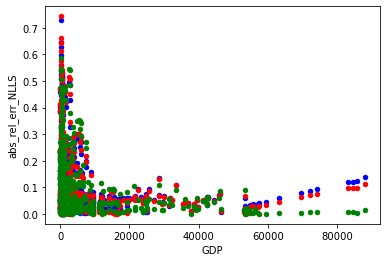

In [245]:
my_plot = testing_life.plot(kind = 'scatter', x='GDP',y='abs_rel_err', c = 'b')
testing_life.plot(kind = 'scatter', x='GDP',y='abs_rel_err_NL_regress',ax=my_plot, c = 'r')
testing_life.plot(kind = 'scatter', x='GDP',y='abs_rel_err_NLLS',ax=my_plot, c = 'g')

## What if our output (target variable) is binary, i.e., it only has two possible outcomes?

# Logistic regression

Consider what happens if our dependent variable - what we want to predict - has only two outcomes.

What are some examples of situations that might have a binary outcome?

In [205]:
# Suggest options here
#Yes/No, Male/Female, Conservative/Liberal

As an example, let's consider if we want to predict if a country is developed or developing based on some feature. Note our outcome is binary - yes or no.

Import the necessary libraries that we don't already have:

In [206]:
from sklearn.model_selection import train_test_split
from math import exp

There are several relevant features that we could use to build our model. We'll try using `Lifeexp` to predict if the country is developed or developing.

Let's begin by visualizing our data, plotting our predictor variable `Lifeexp` against our binary dependent variable `Status_binary`.

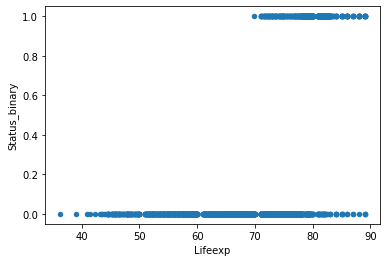

In [207]:
lifeexp.plot(kind='scatter', x='Lifeexp', y='Status_binary')

Now let's divide the data into training and test sets, where we use the 80-20 rule of thumb and use the built-in train/test split function:

In [208]:
train_lifeexp, test_lifeexp, train_stat, test_stat = train_test_split(lifeexp['Lifeexp'], lifeexp['Status_binary'], test_size = 0.20)

We should normalize the training data and shift the mean to the origin, which is an important step due to the nature of a logistic equation (recall the graph of the logistic function, which is centered at the origin). This is done using the *normalize* method.

In [209]:
# Function to normalize data
def normalize(X):
    return X - X.mean()

Now we get our prediction using *predict*, plugging in the values of the weights (or coefficients) into the logistic model equation and giving the required probability of a customer purchasing the product. We will train our model for 300 iterations, and the weights are updated at each iteration.

In [210]:
# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

In [211]:
# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

With the methods developed, apply it to our data by training the model and then using it to make predictions on our test data:

In [212]:
# Training the model
b0, b1 = logistic_regression(train_lifeexp, train_stat)

# Making predictions
test_lifeexp_norm = normalize(test_lifeexp)
stat_pred = predict(test_lifeexp_norm, b0, b1)

This equation gives us a probability that a customer purchased the product. Let's see what the output looks like on our test data:

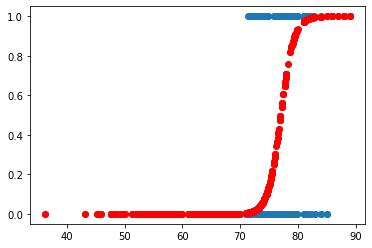

In [213]:
plt.figure()
plt.scatter(test_lifeexp, test_stat)
plt.scatter(test_lifeexp, stat_pred, c = "red")

What if we want to create a binary output from our model too? We can define a threshold, and let all predicted outcomes above that threshold be treated as a 1 (the product was purchased) and all outcomes below that theshold treated as a 0 (the product was not purchased). Let's choose 0.5 as our threshold (is there a better threshold value that could be used?)

In [214]:
stat_pred_binary = [1 if p >= 0.5 else 0 for p in stat_pred]

What does this outcome look like?

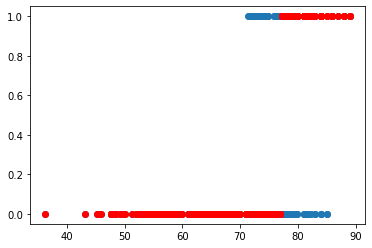

In [215]:
plt.figure()
plt.scatter(test_lifeexp, test_stat)
plt.scatter(test_lifeexp, stat_pred_binary, c = "red")

As a final check, let's take a look at the accuracy of our model, defined as the number of predictions we got correct divided by the total number of predictions made.

In [216]:
# The accuracy
accuracy = 0
for i in range(len(stat_pred_binary)):
    if stat_pred_binary[i] == test_stat.iloc[i]:
        accuracy += 1
        accperc = float(accuracy) / float(len(stat_pred))
print("Accuracy = ")
print(accperc)

Accuracy = 
0.8611670020120724


What would happen if we changed the threshold, which was set to 0.5? Can we make the model more accurate? Explore what happens when we use different threshold values.

## Finally, consider what happens if our outcome variable depends on multiple predictor variables. 

# Multivariate Regression

### Multivariate Linear Regression

We'll consider only multivariate linear regression for now - but note that any of the regression techniques we've used can easily be adapted for using multiple predictor variables. 

Import new libraries:

In [227]:
from sklearn import linear_model
from sklearn.metrics import r2_score

Consider the possibility of the average life expectancy for a country depending on both `Incomecompofresources` and `Schooling`, both factors that should be well-correlated with life expectancy and relatively uncorrelated with each other (why do we want them uncorrelated with each other?). First, we'll extract just those features to form a reduced dataset.

In [228]:
lifemulti = lifeexp[['Lifeexp', 'Incomecompofresources', 'Schooling']]
lifemulti.head()

,Lifeexp,Incomecompofresources,Schooling
0,65.0,0.479,10.1
1,59.9,0.476,10.0
2,59.9,0.470,9.9
3,59.5,0.463,9.8
4,59.2,0.454,9.5


Split up into training and testing data:

In [254]:
train_lifem = lifemulti[0:int(len(lifemulti)*0.75)]
test_lifem = lifemulti[int(len(lifemulti)*0.75):-1]  

In [251]:
x_train = np.array(train_lifem[['Incomecompofresources','Schooling']])
y_train = train_lifem['Lifeexp']
x_test = np.array(test_lifem[['Incomecompofresources','Schooling']])
y_test = test_lifem['Lifeexp']

Training data

In [252]:
ols = linear_model.LinearRegression()
model = ols.fit(x_train, y_train)

In [246]:
model.predict([[0.7, 7]])        #Predicts life expectancy for a country with an ICOR of 0.7 and a schooling value of 7

array([63.96655842])

Let's calculate the relative error

In [233]:
test_lifem["rel_err"] = abs(model.predict(x_test) - y_test) / y_test;

In [234]:
test_lifem.rel_err.mean()

0.07745943810545704

We can see what the correlation is between each variable

test_lifem[["Incomecompofresources","Schooling","Lifeexp"]].corr()

Or, we can get the total R^2 score

In [236]:
r2_score(y_test,model.predict(x_test))

0.5318445838635297

So what is the model?

In [237]:
print(model.coef_)
print(model.intercept_)

[15.40824881  1.328141  ]
43.88379721651194


The model is:

$\text{Life expectancy} = 15.41 +  1.33(\text{ICOR}) + 43.9(\text{Schooling})$

# Regression Project

Now we have enough to finish off our regression project.

4. Answer one of the following questions (your choice). You can answer both for extra credit!

   (a) Make a prediction for the chance of someone to be admitted to graduate school as- suming that they (1) have a TOEFL score of 109 and (2) a GRE score of 325.

   (b) Assume that you have a limited amount of time to study for the TOEFL exam and the GRE exam before applying to graduate school. Right now, your estimated GRE score is 300 and your estimated TOEFL score is 100. Which exam should you spend more time studying for? Should you study for only one of the exams, or both? Discuss and back up your arguments **using what we have learned in this class.**

5. If you have any other ideas or discussion, implement/discuss them for extra credit!